Leer grafos desde matriz de adyacencia

In [2]:
import networkx as nx
import pandas as pd 

nodes = ['A', 'B', 'C', 'D', 'E']
df = pd.DataFrame([[0, 3, 0, 2, 0], 
                   [3, 0, 0, 0, 2], 
                   [0, 0, 1, 1, 0], 
                   [1, 0, 0, 0, 1], 
                   [0, 4, 0, 1, 1]], columns=nodes, index=nodes)
df 
#mandamos a llamar en forma de tabla nuestra matriz creada 

,A,B,C,D,E
A,0,3,0,2,0
B,3,0,0,0,2
C,0,0,1,1,0
D,1,0,0,0,1
E,0,4,0,1,1


In [4]:
G = nx.from_pandas_adjacency(df)
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E'))

In [5]:
G.edges

EdgeView([('A', 'B'), ('A', 'D'), ('B', 'E'), ('C', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'E')])

In [6]:
G.adj

AdjacencyView({'A': {'B': {'weight': 3}, 'D': {'weight': 1}}, 'B': {'A': {'weight': 3}, 'E': {'weight': 4}}, 'C': {'C': {'weight': 1}, 'D': {'weight': 1}}, 'D': {'A': {'weight': 1}, 'C': {'weight': 1}, 'E': {'weight': 1}}, 'E': {'B': {'weight': 4}, 'D': {'weight': 1}, 'E': {'weight': 1}}})

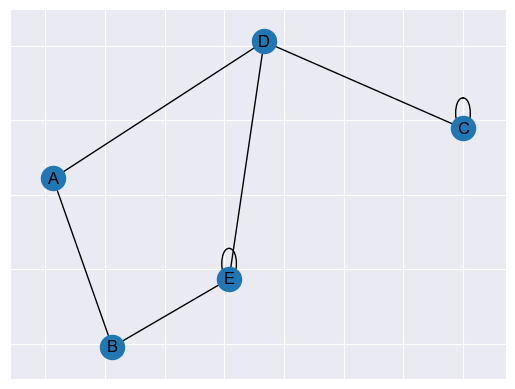

In [7]:
nx.draw_networkx(G, with_labels=True)

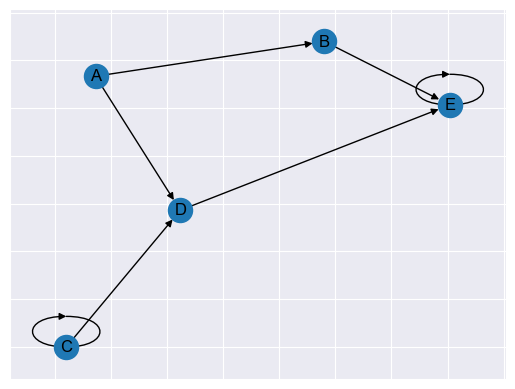

In [9]:
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle='-|>')
#arrows sirve para darle dirección al grafo 

{('A', 'B'): Text(0.1461270644303404, 0.32225892278469703, '3'),
 ('A', 'D'): Text(-0.08003197612610691, -0.1785064553221163, '1'),
 ('B', 'E'): Text(0.3063640230340159, 0.6785153222161848, '4'),
 ('C', 'C'): Text(-0.45265610280090357, -0.8162409071468647, '1'),
 ('C', 'D'): Text(-0.33498583025347034, -0.7410595262055933, '1'),
 ('E', 'E'): Text(0.37771289828693244, 1.0213500213844897, '1')}

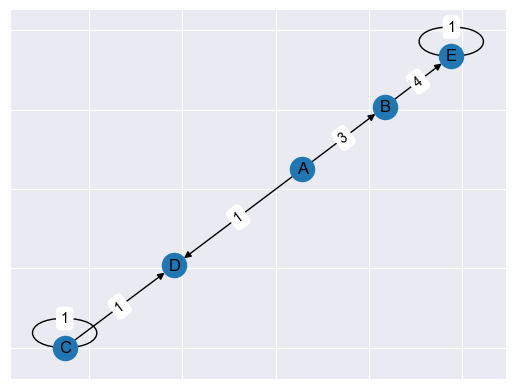

In [14]:
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, with_labels=True, arrows=True, arrowstyle='-|>')
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


Eliminando aristas

In [15]:
G.remove_edge('D','E')
nx.draw_networkx(G, with_labels=True, arrows=True, **options)
#se tiene que volver a correr la anterior celda para ver como cambió nuestro grafo (por eso sale error, porque ya no existe je) 

NetworkXError: The edge D-E is not in the graph

Grafo dirigido desde matriz de adyacencia 

In [16]:
df

,A,B,C,D,E
A,0,3,0,2,0
B,3,0,0,0,2
C,0,0,1,1,0
D,1,0,0,0,1
E,0,4,0,1,1


In [19]:
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph())

G.is_directed()

True

In [20]:
G.adj

AdjacencyView({'A': {'B': {'weight': 3}, 'D': {'weight': 2}}, 'B': {'A': {'weight': 3}, 'E': {'weight': 2}}, 'C': {'C': {'weight': 1}, 'D': {'weight': 1}}, 'D': {'A': {'weight': 1}, 'E': {'weight': 1}}, 'E': {'B': {'weight': 4}, 'D': {'weight': 1}, 'E': {'weight': 1}}})

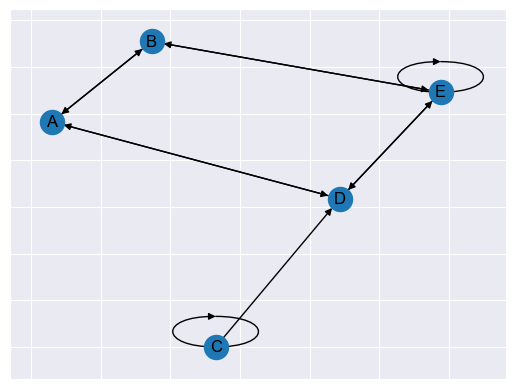

In [21]:
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle='-|>')

{('A', 'B'): Text(0.3301752005966282, 0.08955302768794482, '3'),
 ('A', 'D'): Text(-0.25672500411396115, 0.11584875106340697, '2'),
 ('B', 'A'): Text(0.33018146993867836, 0.08955477104616083, '3'),
 ('B', 'E'): Text(0.45449384367094103, 0.3841596821114637, '2'),
 ('C', 'C'): Text(-0.395541512722824, -0.8398643686314269, '1'),
 ('C', 'D'): Text(-0.4804388849129848, -0.3902426372905061, '1'),
 ('D', 'A'): Text(-0.25673566646987755, 0.11585233336504963, '1'),
 ('D', 'E'): Text(-0.13240430523279845, 0.4104475442274058, '1'),
 ('E', 'B'): Text(0.45450833963572224, 0.3841392334600797, '4'),
 ('E', 'D'): Text(-0.13241085257968344, 0.4104446570384883, '1'),
 ('E', 'E'): Text(0.30052404572802327, 0.7614919450543036, '1')}

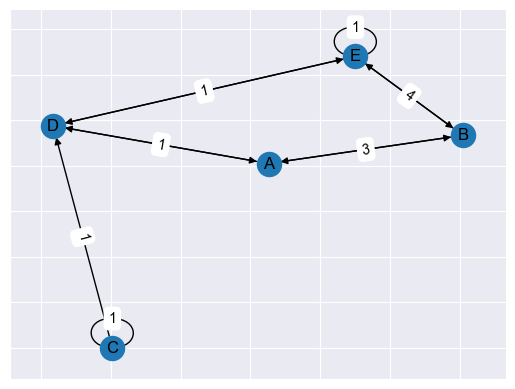

In [22]:
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, with_labels=True, arrows=True, arrowstyle='-|>')
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)